In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# Cities

In [2]:
cities = pd.read_csv("CitiesExt.csv")

temp = cities.temperature
latitude = cities.latitude
longitude = cities.longitude

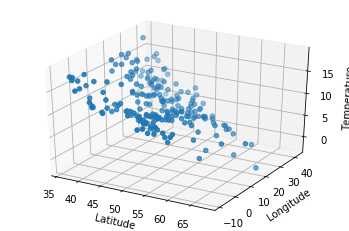

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.array(latitude)
y = np.array(longitude)
z = np.array(temp)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Temperature")
plt.show()

# Множественная линейная регрессия для датасета Cities, используя библиотеку Statmodels.api

In [4]:
import statsmodels.api as sm

X = cities[['latitude', 'longitude']].values
y = cities['temperature'].values
X = sm.add_constant(X)


# Заметьте, что аргумент y стоит первым, а матрица с данными X - вторым
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # получить предсказания значений температуры от модели

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     307.4
Date:                Tue, 07 Jul 2020   Prob (F-statistic):           4.09e-63
Time:                        22:37:35   Log-Likelihood:                -426.56
No. Observations:                 213   AIC:                             859.1
Df Residuals:                     210   BIC:                             869.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.9776      0.916     34.928      0.000      30.173      33.782
x1            -0.4504      0.019    -24.315      0.000      -0.487      -0.414
x2            -0.0705      0.010     -7.394      0.000      -0.089      -0.052
==============================================================================
Omnibus:                        8.030   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.018   Jarque-Bera (JB):               10.177
Skew:                          -0.279   Prob(JB):                      0.00617
Kurtosis:                       3.913   Cond. No.                         373.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Множественная линейная регрессия, используя библиотеку Sklearn

In [5]:
import sklearn
from sklearn import linear_model

X = cities[['latitude', 'longitude']].values
y = cities['temperature'].values

multiple_regr = linear_model.LinearRegression()
multiple_regr.fit(X, y)

# Находим коэффициенты регрессии
intercept = multiple_regr.intercept_
slopes = multiple_regr.coef_

print("Intercept: ", intercept)
print("Slope coefficients: ", slopes)
print("R^2: ", multiple_regr.score(X, y))


Intercept:  31.977640078172964
Slope coefficients:  [-0.45042671 -0.07054448]
R^2:  0.7454176946292812


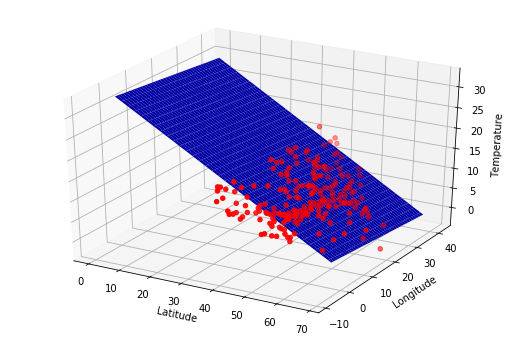

In [6]:
#  Данные для графика
x = np.array(latitude)
y = np.array(longitude)
z = np.array(temp)

# Данные для построение плоскости, которую построит множественнная линейная регрессия
xx, yy = np.meshgrid(range(int(round(np.max(x)))), range(int(round(np.max(y)))))
z_pred_plot = intercept + xx*slopes[0]+ yy*slopes[1]

fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d')

ax.scatter(x, y, z, color='red')
ax.plot_surface(xx, yy, z_pred_plot, color='blue')
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Temperature")
plt.show()